In [ ]:
import pandas as pd

df = pd.read_csv('/content/Yoga - Sheet1.csv',encoding='latin1')

print(df.head())


   Id            Asana Name  \
0   1  Adho Mukha Svanasana   
1   2          Bhujangasana   
2   3           Trikonasana   
3   4              Savasana   
4   5            Uttanasana   

                                         Description  \
0  Stretches the shoulders, hamstrings, calves, a...   
1  Stretches the chest, lungs, shoulders, and abd...   
2  Stretches and strengthens the thighs, knees, a...   
3  Relaxes the body and mind. Helps reduce stress...   
4  Stretches the hips, hamstrings, and calves. St...   

                        Benefit  
0    Stress, Anxiety, Headaches  
1   Back Pain, Sciatica, Asthma  
2  Digestive Disorders, Anxiety  
3     Stress, Anxiety, Insomnia  
4   Back Pain, Anxiety, Fatigue  


In [ ]:
df

,Asana Name,Benefit
0,Adho Mukha Svanasana,Strengthens arms and legs
1,Bhujangasana,Strengthens spine
2,Trikonasana,Stretches and strengthens legs


In [ ]:
pip install imgkit

In [ ]:
  import pandas as pd
from IPython.display import display, HTML

data = {
    'Asana Name': ['Adho Mukha Svanasana', 'Bhujangasana', 'Trikonasana', 'Preliminary Nasikagra Drishti (Eye Exercise)', 'Nearing And Distant Viewing (Eye Exercise)', 'Shambhavi Mudra (eyebrow centre gazing)', 'Savasana'],
    'Benefit': ['Strengthens arms and legs', 'Strengthens spine', 'Stretches and strengthens legs', 'Improves focus', 'Improves vision', 'Promotes eye health', 'Relaxes the body']
}
df = pd.DataFrame(data)

column_color = "#966827"
row_color1 = "#966827"
row_color2 = "#243361"

def style_function(row, column_color, row_color1, row_color2):
    if row.name is None:
        return ['color: ' + column_color] * len(row)
    elif row.name % 2 == 0:
        return ['background-color: ' + row_color1] * len(row)
    else:
        return ['background-color: ' + row_color2] * len(row)

styled_df = df.style.apply(style_function, axis=1, column_color=column_color, row_color1=row_color1, row_color2=row_color2)

display(styled_df)


,Asana Name,Benefit
0,Adho Mukha Svanasana,Strengthens arms and legs
1,Bhujangasana,Strengthens spine
2,Trikonasana,Stretches and strengthens legs
3,Preliminary Nasikagra Drishti (Eye Exercise),Improves focus
4,Nearing And Distant Viewing (Eye Exercise),Improves vision
5,Shambhavi Mudra (eyebrow centre gazing),Promotes eye health
6,Savasana,Relaxes the body


In [ ]:
pip install wordcloud

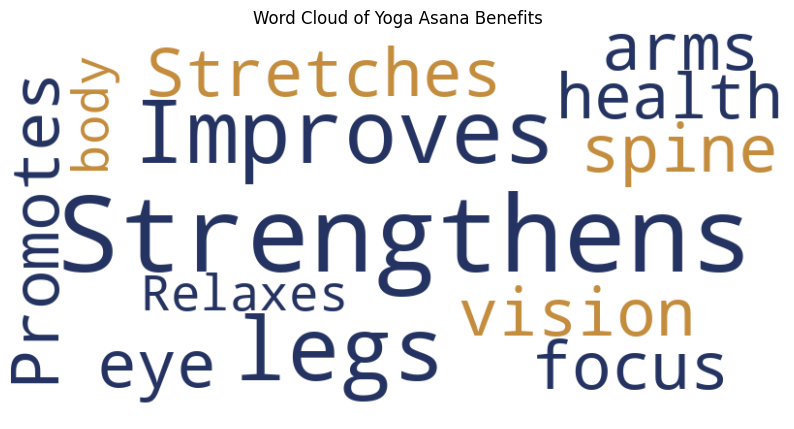

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

def generate_color_func(color1, color2):
    def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
        return color1 if np.random.rand() < 0.5 else color2
    return color_func

benefits_text = ' '.join(df['Benefit'].astype(str).fillna(''))

color1 = '#c48c3d'  # Color 1
color2 = '#243361'  # Color 2

wordcloud = WordCloud(width=800, height=400, background_color='white', color_func=generate_color_func(color1, color2)).generate(benefits_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Yoga Asana Benefits')
plt.show()

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

def preprocess_text(text, advanced=False):
    if pd.isna(text):
        return ''

    # Convert text to lowercase
    text = str(text).lower()

    # Remove non-alphanumeric characters and extra whitespaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()

    if advanced:
        # Tokenize the text
        tokens = word_tokenize(text)

        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        tokens = [word for word in tokens if word not in stop_words]

        # Apply stemming
        stemmer = PorterStemmer()
        tokens = [stemmer.stem(word) for word in tokens]

        # Combine tokens back into a single string
        text = ' '.join(tokens)

    return text

df['Benefit'] = df['Benefit'].apply(preprocess_text)

df['combined_text'] =  df['Benefit']

tfidf_vectorizer = TfidfVectorizer()

tfidf_matrix = tfidf_vectorizer.fit_transform(df['combined_text'])

print("TF-IDF Matrix Shape:", tfidf_matrix.shape)

TF-IDF Matrix Shape: (7, 15)


In [ ]:
def generate_recommendations(user_input, df):
    user_discomforts = user_input.lower().split(',')
    user_discomforts = [discomfort.strip() for discomfort in user_discomforts]

    asana_scores = {}

    for index, row in df.iterrows():
        asana_name = row['Asana Name']
        benefits = row['Benefit']

        score = sum(discomfort in benefits for discomfort in user_discomforts)

        asana_scores[asana_name] = score

    sorted_asanas = sorted(asana_scores.items(), key=lambda x: x[1], reverse=True)

    top_recommendations = [asana[0] for asana in sorted_asanas[:5]]

    return top_recommendations

user_input = input("Enter your discomforts separated by commas: ")

recommended_asanas = generate_recommendations(user_input, df)
print("Recommended Yoga Asanas:", recommended_asanas)

Enter your discomforts separated by commas: focus
Recommended Yoga Asanas: ['Preliminary Nasikagra Drishti (Eye Exercise)', 'Adho Mukha Svanasana', 'Bhujangasana', 'Trikonasana', 'Nearing And Distant Viewing (Eye Exercise)']


In [ ]:
def generate_recommendations(user_input, df):
    user_discomforts = user_input.lower().split(',')
    user_discomforts = [discomfort.strip() for discomfort in user_discomforts]

    asana_scores = {}

    for index, row in df.iterrows():
        asana_name = row['Asana Name']
        benefits = row['Benefit']

        score = sum(discomfort in benefits for discomfort in user_discomforts)

        asana_scores[asana_name] = score

    sorted_asanas = sorted(asana_scores.items(), key=lambda x: x[1], reverse=True)

    top_recommendations = [asana[0] for asana in sorted_asanas[:5]]

    return top_recommendations

user_input = input("Enter your discomforts separated by commas: ")

recommended_asanas = generate_recommendations(user_input, df)

print("Recommended Yoga Asanas:")
for asana in recommended_asanas:
    print(asana)


Enter your discomforts separated by commas: 
Recommended Yoga Asanas:
Adho Mukha Svanasana
Bhujangasana
Trikonasana
Preliminary Nasikagra Drishti (Eye Exercise)
Nearing And Distant Viewing (Eye Exercise)


Enter your discomforts separated by commas: focus


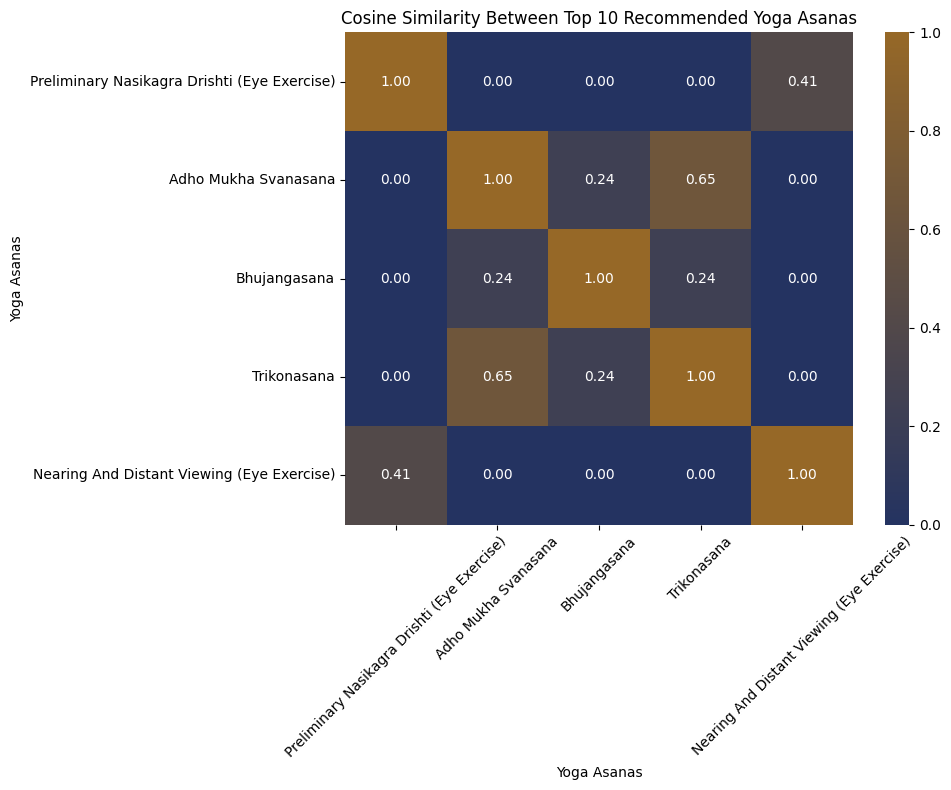

In [ ]:
def generate_recommendations(user_input, df):
    user_discomforts = user_input.lower().split(',')
    user_discomforts = [discomfort.strip() for discomfort in user_discomforts]

    asana_scores = {}

    for index, row in df.iterrows():
        asana_name = row['Asana Name']
        benefits = row['Benefit']

        score = sum(discomfort in benefits for discomfort in user_discomforts)

        asana_scores[asana_name] = score

    sorted_asanas = sorted(asana_scores.items(), key=lambda x: x[1], reverse=True)

    top_recommendations = [asana[0] for asana in sorted_asanas[:5]]

    return top_recommendations

user_input = input("Enter your discomforts separated by commas: ")

recommended_asanas = generate_recommendations(user_input, df)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

color1 = "#966827"
color2 = "#243361"

colors = [color2, color1]
cmap = LinearSegmentedColormap.from_list("custom_colormap", colors, N=256)

from sklearn.metrics.pairwise import cosine_similarity

top_10_asanas_indices = [df[df['Asana Name'] == asana].index[0] for asana in recommended_asanas[:10]]
tfidf_top_10 = tfidf_matrix[top_10_asanas_indices]

cosine_sim_top_10 = cosine_similarity(tfidf_top_10, tfidf_top_10)

plt.figure(figsize=(10, 8))
sns.heatmap(cosine_sim_top_10, cmap=cmap, annot=True, fmt=".2f", xticklabels=df.loc[top_10_asanas_indices, 'Asana Name'], yticklabels=df.loc[top_10_asanas_indices, 'Asana Name'])
plt.title('Cosine Similarity Between Top 10 Recommended Yoga Asanas')
plt.xlabel('Yoga Asanas')
plt.ylabel('Yoga Asanas')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
